In [615]:
# Librerías para ciencia de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Hotel Booking Dataset – Descripción de los features

| Feature | Description |
|--------|-------------|
| hotel | Hotel type: H1 = Resort Hotel, H2 = City Hotel |
| is_canceled | Whether the booking was canceled (1=yes, 0=no) |
| lead_time | Days between booking and arrival |
| arrival_date_year | Arrival year |
| arrival_date_month | Arrival month (string) |
| arrival_date_week_number | Week number of arrival date |
| arrival_date_day_of_month | Day of month of arrival date |
| stays_in_weekend_nights | Weekend nights (Sat–Sun) stayed or booked |
| stays_in_week_nights | Week nights (Mon–Fri) stayed or booked |
| adults | Number of adults |
| children | Number of children |
| babies | Number of babies |
| meal | Meal type (SC, BB, HB, FB) |
| country | Country of origin (ISO 3155–3) |
| market_segment | Market segment (TA = Travel Agents, TO = Tour Operators) |
| distribution_channel | Distribution channel (TA = Travel Agents, TO = Tour Operators) |
| is_repeated_guest | Whether guest is repeated (1=yes, 0=no) |
| previous_cancellations | Number of previous cancellations |
| previous_bookings_not_canceled | Number of previous non-canceled bookings |
| reserved_room_type | Reserved room code (anonymized) |
| assigned_room_type | Assigned room code (may differ from reserved) |
| booking_changes | Number of changes made to the booking |
| deposit_type | Deposit type (No Deposit, Non Refund, Refundable) |
| agent | Travel agency ID |
| company | Company/Entity ID responsible for booking |
| days_in_waiting_list | Days the booking was on waiting list |
| customer_type | Booking type (Contract, Group, Transient, Transient-party) |
| adr | Average Daily Rate |
| required_car_parking_spaces | Required parking spaces |
| total_of_special_requests | Count of special requests |
| reservation_status | Final status (Canceled, Check-Out, No-Show) |
| reservation_status_date | Date of last reservation status update |



In [616]:
# Importar el csv
df = pd.read_csv('./hotel_bookings.csv')

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [618]:
df.shape


(119390, 32)

In [619]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [620]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


adr-> el precio promedio que se paga al dia / teine valores negativos 
adultos /bebes/children-> sus maximos son de 10 no parece tener sentido el de adultos hasta 55
37% personas ahn cancelado
el tiempo promedio de anticipacion es de 104 aprox 3.5 meses
cada reservacion teine en promedio 1.8 adultos 


In [621]:
# reservations status date es fecha  lo convertimos 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [622]:
# Vemos las columnas que pueden combinar strings con ints  o solo strings que son objetos
df.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [623]:
# Revisamos las columnas númericas 
df.select_dtypes(include='number').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [624]:
# Revisamos el status de valores nulos 

# Encontramos que hay unos cuantos en country 
# En compañia hay demasiados por lo cual esa columna esta perdida
# Tiene casi el 90% de los datos en nulos por lo cual no es util 
# Agente si la podemos salvar
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [625]:
df["children"].isna().sum()

np.int64(4)

In [626]:
df["agent"].value_counts()
#hay que tener cuidado con esta variable aunque sea numerica es categorica 

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [627]:
df["country"].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

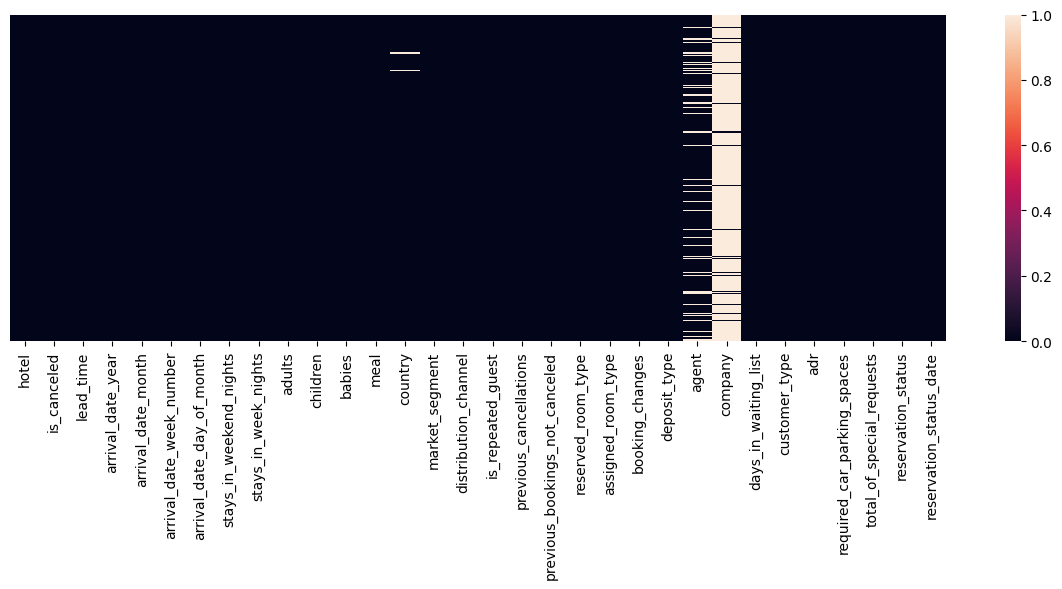

In [628]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [629]:
df.drop(['company'], axis = 1, inplace = True)
df.shape
#no tienenmucha relevancia debido a los nulos 

(119390, 31)

columnas con missing values:
* country
* agent
* company
* children


In [630]:
#nan_replacement_dict = {"children": 0 ,"country" : "UKNWN", 'agent' : 0.0, 'company' : 0}
# df.fillna(value=nan_replacement_dict, inplace=True)

#rellenamos a chidren 

In [631]:
df['agent'].value_counts()
df = df[(df["agent"].notna())  & (df["country"].notna())  & 
        (df["children"].notna()) & (df["adr"] > 0) & (df["adr"] < 5300) 
        & ~((df["children"] > 0) & (df["adults"] == 0)) & 
          ~((df["babies"] > 0) & (df["adults"] == 0)) & 
            ~((df["babies"] > 0) & (df["children"] > 0) & (df["adults"] == 0))   ]
# agregue adr porque tiene valores negativos en el describe y pues esta mal tener  un average en negativo  adr = Average Daily Rate
# eliminamos reservas que solo tienen niños pero ningun adulto lo cual no tiene sentido e igual lo de los bebes 
# No borramos el outlier de 10 hijos debido a que eso si es posible.
df.reset_index(drop=True, inplace=True)
# en este paso borramos todos los Nans que tenemos 
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101675,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
101676,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
101677,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
101678,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [632]:
df["children"].value_counts()

children
0.0     94037
1.0      4382
2.0      3207
3.0        53
10.0        1
Name: count, dtype: int64

In [633]:
df.shape
# perdimos unos 17k filas pero no afecta tanto al análisis 

(101680, 31)

In [634]:
df['agent'].value_counts()
# revisamos que no tengamos valores raros

agent
9.0      31677
240.0    13737
1.0       7078
14.0      3604
7.0       3514
         ...  
70.0         1
93.0         1
54.0         1
497.0        1
451.0        1
Name: count, Length: 331, dtype: int64

In [635]:
df.isna().isnull().sum()
# Revisamos que no haya valores nulls 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [636]:
df.isna().sum()
# revisamos igualmente los Nan

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [637]:
df.duplicated().sum()
# revisamos valores duplicados generales


np.int64(27701)

In [638]:
df_numeric = df.select_dtypes(include='number')
df_numeric.columns.tolist()
# Convertimos las columnas numericas en  una lista

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [639]:
df_categoric = df.select_dtypes(include='object')
df_categoric.columns.tolist()

# aqui las categoricas todo esto para una mejro manipulacion

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [640]:
categoricas=[col for col in df.columns if df[col].dtype=='object']
categoricas=df[categoricas]
categoricas.nunique()
# revismaos valores unicos de las variables categoricas que sean object 
# Sabemos que por ejemplo agente es categorica por ser el id de la agencia

hotel                     2
arrival_date_month       12
meal                      5
country                 174
market_segment            7
distribution_channel      4
reserved_room_type        8
assigned_room_type       10
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [641]:
for col in categoricas:
    print(f"{col}: {categoricas[col].nunique(),df[col].unique()}")

# nos sirve para ver los valores de las variables que tienen string para ver casos raros

hotel: (2, array(['Resort Hotel', 'City Hotel'], dtype=object))
arrival_date_month: (12, array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object))
meal: (5, array(['BB', 'FB', 'HB', 'Undefined', 'SC'], dtype=object))
country: (174, array(['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'ROU', 'NOR', 'OMN', 'ARG',
       'POL', 'DEU', 'FRA', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'NLD', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'CYM', 'ZMB', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN',
       'JAM', 'HRV', 'HKG', 'ISR', 'IRN', 'GEO', 'AND', 'GIB', 'URY',
       'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN',
       'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN',
       'SYC', 'AZE', 'BHR', 'NZL', 'THA

In [642]:
print(df['is_canceled'].value_counts())
print(df['is_canceled'].dtype)

# vemos que tan desvalanceada esta nuestra variable objetiva 


is_canceled
0    61688
1    39992
Name: count, dtype: int64
int64


In [643]:
df.describe()
# volvemos a hacer describe para ver los datos y revisar que no se nos pase nada

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680.000000,101680
mean,0.393312,112.228590,2016.160081,27.314723,15.786005,0.983527,2.603157,1.907789,0.107838,0.007710,0.011998,0.077783,0.023279,0.198977,86.525482,2.626436,105.700848,0.053452,0.605940,2016-07-29 21:40:57.403619328
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.260000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,27.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,74.150000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,80.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,97.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,128.440000,0.000000,1.000000,2017-02-14 00:00:00
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,510.000000,3.000000,5.000000,2017-09-14 00:00:00
std,0.488488,107.692375,0.705630,13.256475,8.795654,1.001348,1.894024,0.448044,0.404108,0.097266,0.108879,0.762377,0.428917,0.615198,110.692954,18.842477,46.304337,0.226199,0.799473,NaN


In [644]:
'''
vemos que hay valore atipicos en adr con valores negativos ya lo arregle en el filtro de arriba para no tneer datos incorrectos
se nos había pasado pero ya esta bien 

de igual manera nos dimos cuenta de que lead_time tenia valores muy altos osea no hay personas que se quedan 3 años en un hotel 
'''

'\nvemos que hay valore atipicos en adr con valores negativos ya lo arregle en el filtro de arriba para no tneer datos incorrectos\nse nos había pasado pero ya esta bien \n\nde igual manera nos dimos cuenta de que lead_time tenia valores muy altos osea no hay personas que se quedan 3 años en un hotel \n'

In [645]:
df.describe(include='object').T

# ahora de las variables categoricas tipo string 
# como de que city hotel tiene casi el 80% de donde va la gente o cancela 

,count,unique,top,freq
hotel,101680,2,City Hotel,70376
arrival_date_month,101680,12,August,12560
meal,101680,5,BB,76751
country,101680,174,PRT,36832
market_segment,101680,7,Online TA,55527
distribution_channel,101680,4,TA/TO,93474
reserved_room_type,101680,8,A,72490
assigned_room_type,101680,10,A,64028
deposit_type,101680,3,No Deposit,89111
customer_type,101680,4,Transient,77007


In [646]:
sns.color_palette("Paired")
# agarramos una paleta de colores 

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

/var/folders/3v/_6y13gkj0sjcp2f7xcpfmr4h0000gn/T/ipykernel_62324/2130185491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette="hls")


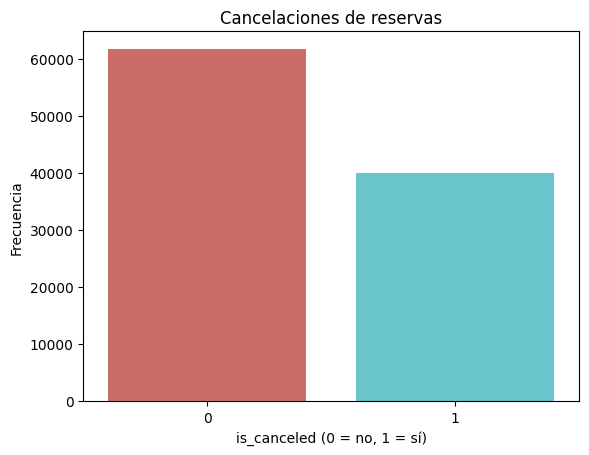

In [647]:
count = df['is_canceled'].value_counts()
sns.countplot(x='is_canceled', data=df, palette="hls")
plt.title("Cancelaciones de reservas")
plt.xlabel("is_canceled (0 = no, 1 = sí)")
plt.ylabel("Frecuencia")
plt.show()
# revisamos que tan balanceada esta nuestra variable objetivo y se ve bien no es tanto es como un 33% de diferencia 


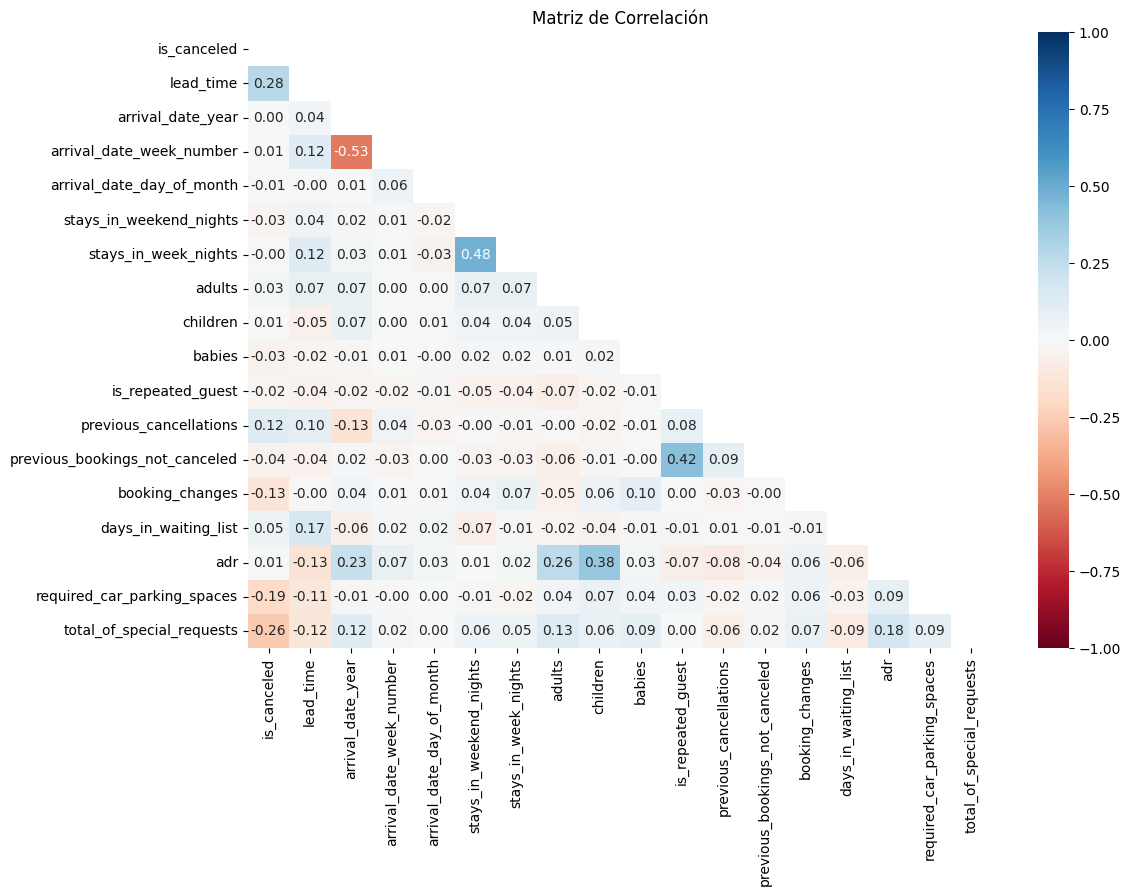

In [648]:
variables_numericas = ['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

correlacion = df[variables_numericas].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    correlacion,
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="RdBu",
    mask=np.triu(correlacion)
)
plt.title("Matriz de Correlación")
plt.show()


In [649]:
'''
en la matriz de correlación podemos ver las variables que más influyen si se cancela o no 
son especial request, estacionamiento , booking_changes, previous cancellations y la que más es lead on time 

la cual tiene sentido ya que es ver si llegaron a tiempo los clientes 
'''


'\nen la matriz de correlación podemos ver las variables que más influyen si se cancela o no \nson especial request, estacionamiento , booking_changes, previous cancellations y la que más es lead on time \n\nla cual tiene sentido ya que es ver si llegaron a tiempo los clientes \n'

In [ ]:
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df[col_numericas].hist(bins=50, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

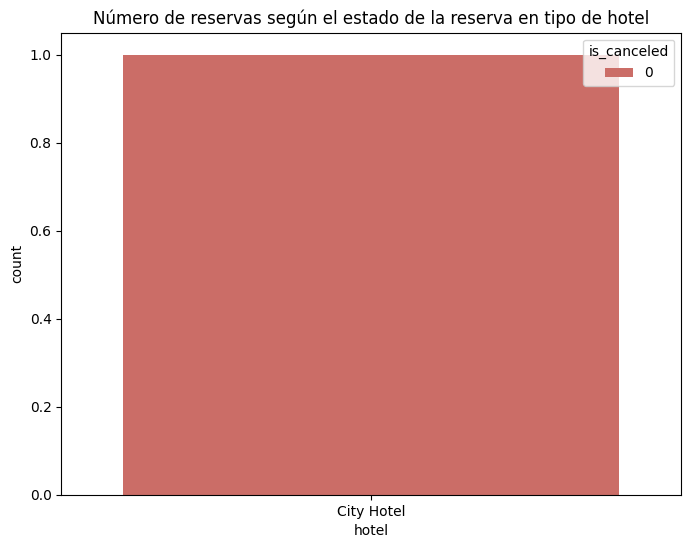

In [ ]:
sns.set_palette("hls")
plt.figure(figsize = (8,6))
sns.countplot(x = 'hotel', data = df, hue = 'is_canceled',palette="hls")
plt.title("Número de reservas según el estado de la reserva en tipo de hotel")
plt.show()

In [ ]:
df.groupby(['hotel'])['is_canceled'].value_counts()

hotel       is_canceled
City Hotel  0              1
Name: count, dtype: int64

Los hoteles de la ciudad tienen una tasa de cancelación más alta que los resorts.
Alrededor del 30% en los resorts y más del 50% en los urbanos.

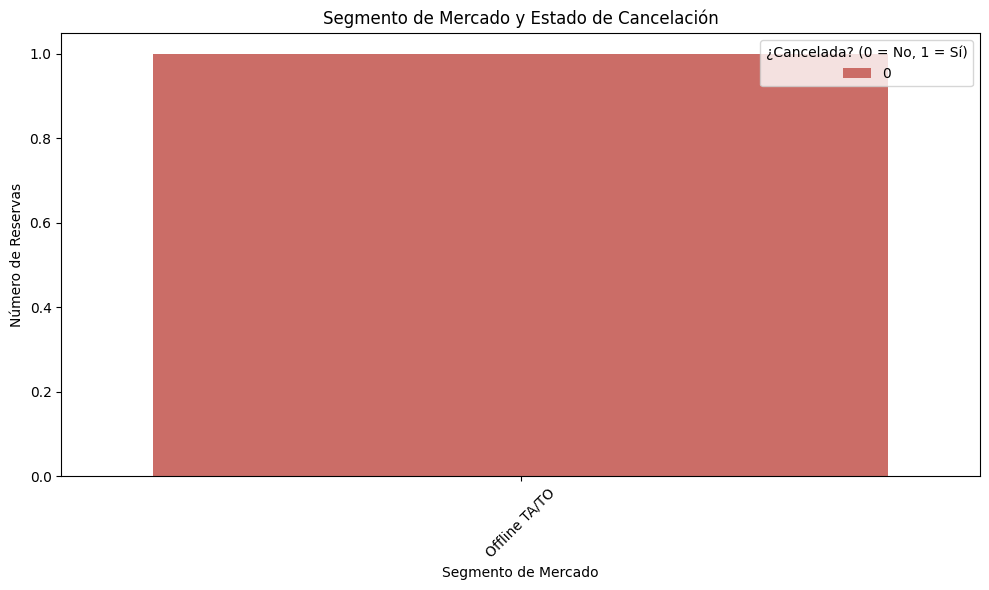

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

sns.countplot(
    x='market_segment',
    data=df,
    hue='is_canceled',
    palette="hls",
    ax=ax
)

ax.set_title("Segmento de Mercado y Estado de Cancelación")
ax.set_xlabel("Segmento de Mercado")
ax.set_ylabel("Número de Reservas")
ax.legend(title="¿Cancelada? (0 = No, 1 = Sí)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Las tasas de cancelación suelen ser altas en las reservas online, presencial y de grupo.

Text(0.5, 1.0, 'Lead Time por Año de Llegada y Cancelación')

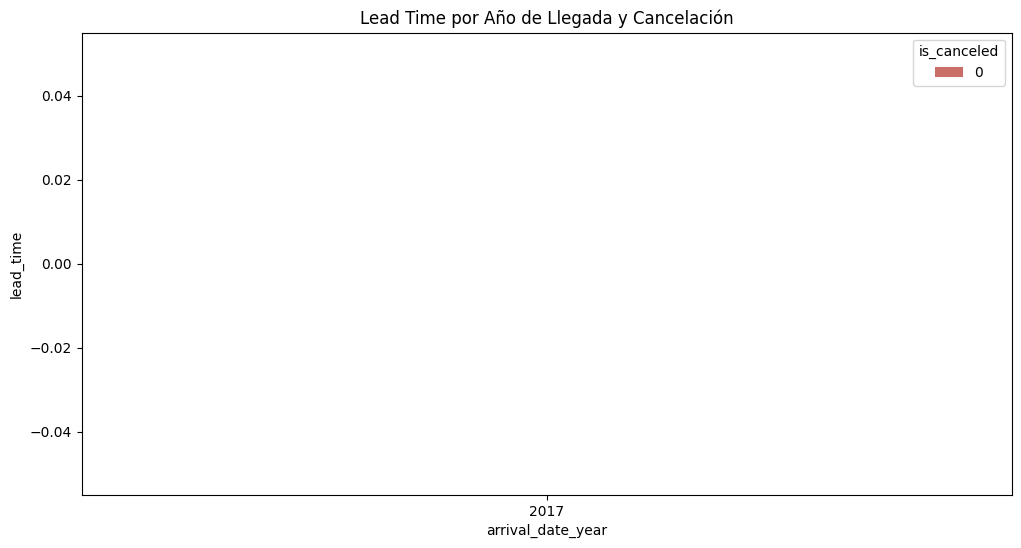

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data=df, palette="hls")
plt.title("Lead Time por Año de Llegada y Cancelación")

In [ ]:
df.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2017    0.0
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'Reservas por Año de Llegada y Tipo de Hotel')

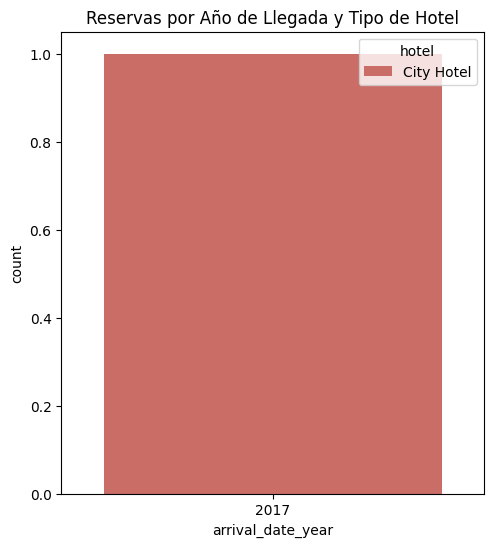

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette="hls")
plt.title("Reservas por Año de Llegada y Tipo de Hotel")

/var/folders/3v/_6y13gkj0sjcp2f7xcpfmr4h0000gn/T/ipykernel_62324/2356601939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_type', data=df, ax=ax[0],palette="hls")


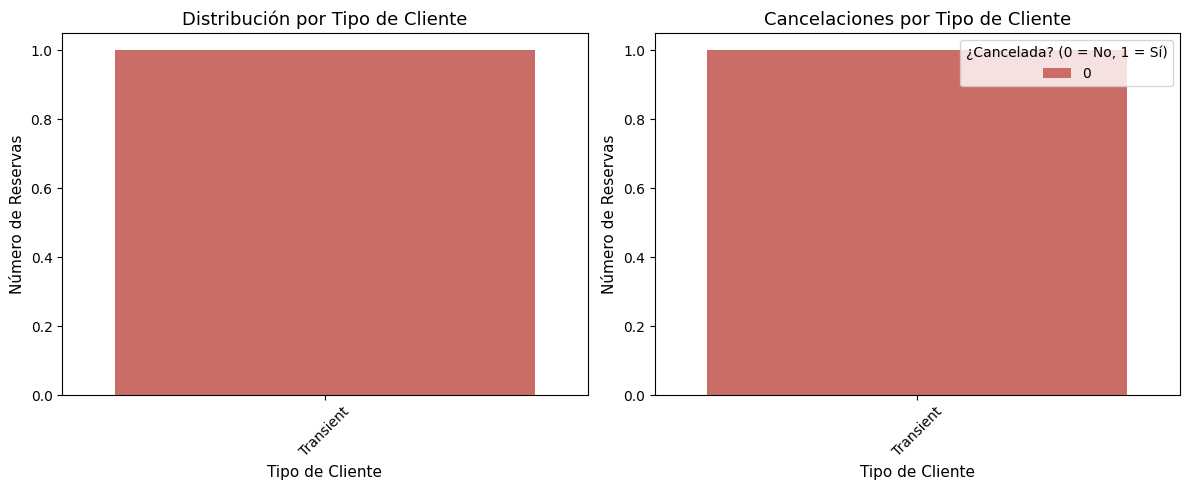

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(x='customer_type', data=df, ax=ax[0],palette="hls")
ax[0].set_title("Distribución por Tipo de Cliente", fontsize=13)
ax[0].set_xlabel("Tipo de Cliente", fontsize=11)
ax[0].set_ylabel("Número de Reservas", fontsize=11)
ax[0].tick_params(axis='x', rotation=45)


sns.countplot(x='customer_type', data=df, hue='is_canceled', ax=ax[1], palette="hls")
ax[1].set_title("Cancelaciones por Tipo de Cliente", fontsize=13)
ax[1].set_xlabel("Tipo de Cliente", fontsize=11)
ax[1].set_ylabel("Número de Reservas", fontsize=11)
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title="¿Cancelada? (0 = No, 1 = Sí)", fontsize=10)

plt.tight_layout()
plt.show()


El tipo de cliente Transient concentra la mayoría de las reservas y también la mayor proporción de cancelaciones.
En cambio, Contract casi no cancela, mostrando un comportamiento mucho más estable.

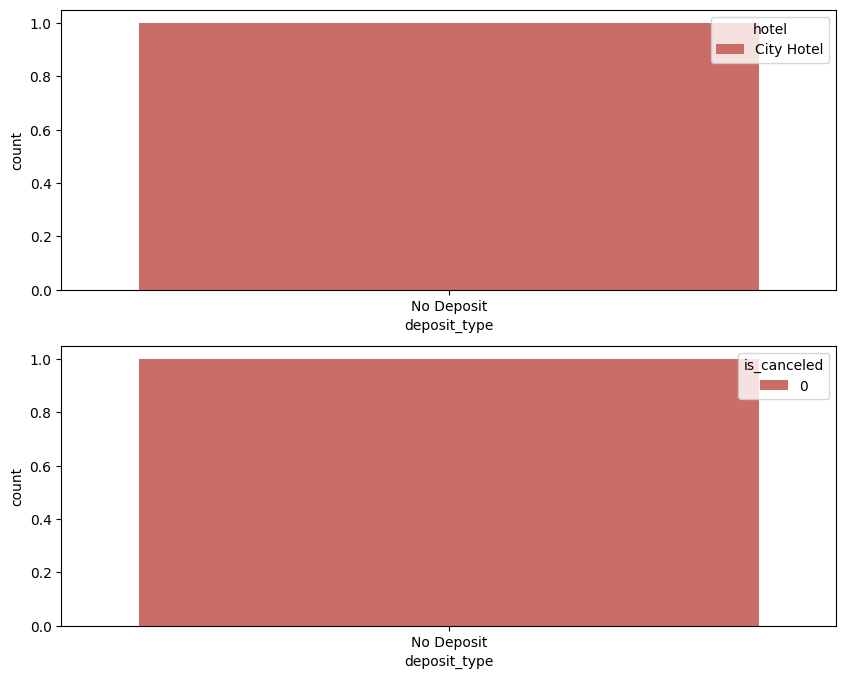

In [ ]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'deposit_type', data = df, hue = 'hotel', ax = ax[0],palette="hls")
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled', ax = ax[1], palette="hls")
plt.show()

/var/folders/3v/_6y13gkj0sjcp2f7xcpfmr4h0000gn/T/ipykernel_62324/2767393659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order, palette="hls")


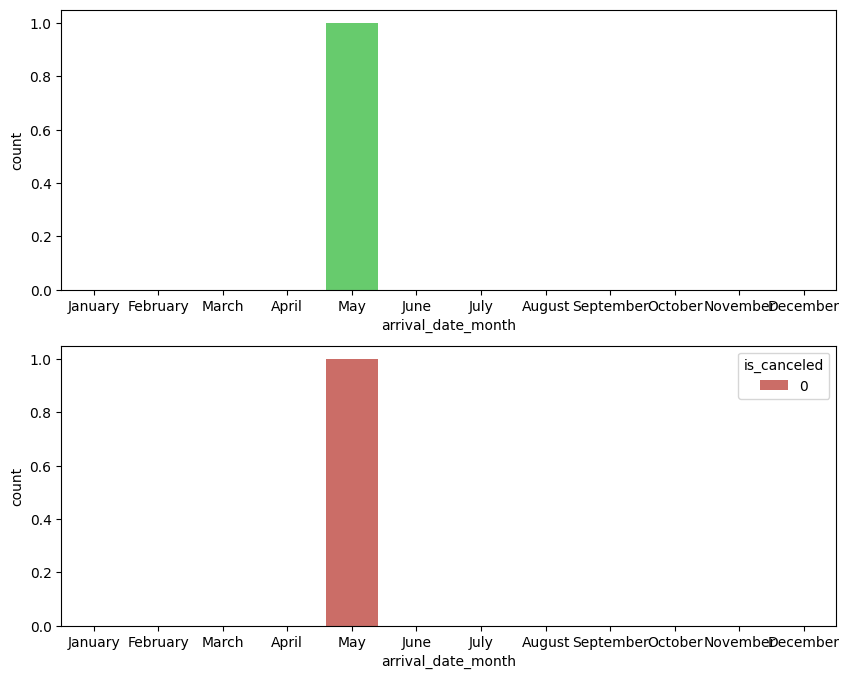

In [ ]:
order = ['January',
 'February', 'March' ,'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December' ]

_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order, palette="hls")
sns.countplot(x = 'arrival_date_month', data = df, hue = 'is_canceled', ax = ax[1], order = order, palette="hls")
plt.show()

Box plots of numerical features vs cancellation status falta

Cancelación debido a la diferencia entre el tipo de habitación deseada y la asignada¶

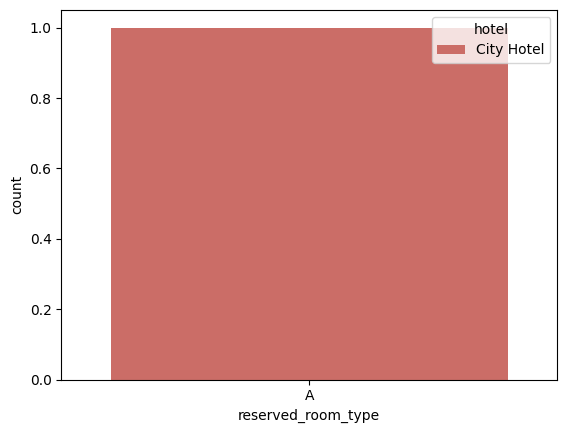

In [ ]:
sns.countplot(x = 'reserved_room_type', hue = 'hotel', data = df, palette="hls")
plt.show()


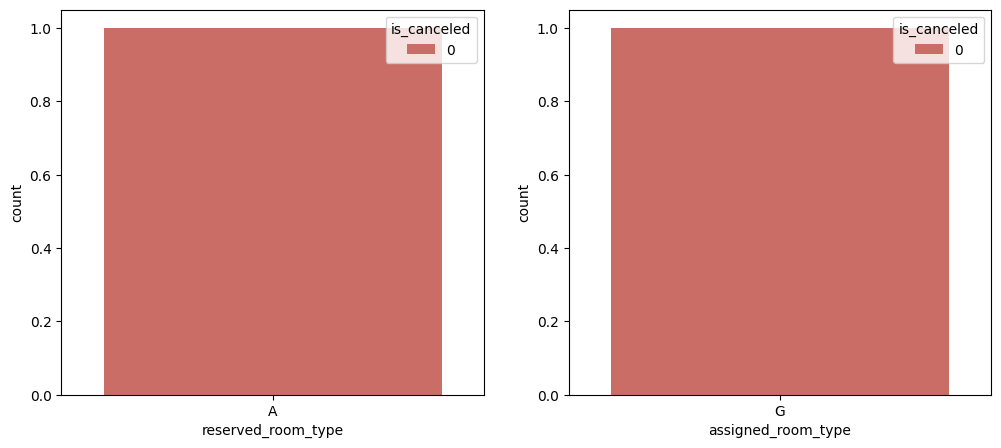

In [ ]:

_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data = df,  ax = ax[0], palette="hls")
sns.countplot(x = 'assigned_room_type', hue = 'is_canceled', data = df,  ax = ax[1], palette="hls")
plt.show()


Los tipos de habitación A, D y E tienen un nivel de reserva y asignación bastante alto. Sin embargo, como resultado, también tienen una alta tasa de cancelación.  un motivo de cancelación podría ser la asignación de un tipo de habitación no deseado. 

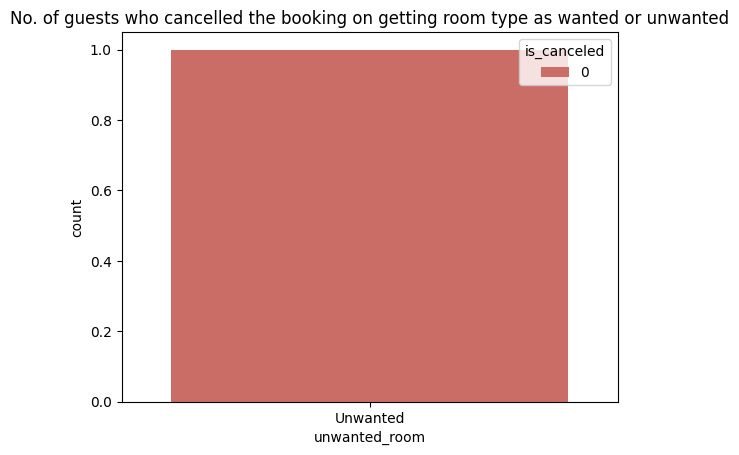

In [ ]:
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'Wanted', 'Unwanted')
df['unwanted_room'] = unwanted_room
sns.countplot(x = 'unwanted_room', data = df, hue = 'is_canceled', palette="hls")
plt.title("No. of guests who cancelled the booking on getting room type as wanted or unwanted")
plt.show()


Aunque inicialmente pensamos que una reserva se cancelaría con mayor probabilidad cuando el tipo de habitación asignado no coincidía con el solicitado, los datos muestran que la tasa de cancelación en estos casos es muy baja.
Esto significa que la diferencia entre la habitación reservada y la asignada no parece influir de forma significativa en las cancelaciones.

MODELO

In [ ]:
df.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'unwanted_room'],
      dtype='object')

In [ ]:
df.drop(columns=['reservation_status', 'reservation_status_date',
'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month'], inplace=True)


eliminamos estas porque esas columnas no existen en el momento real de la reserva, solo existen después del resultado.

In [ ]:
hotel={'Resort Hotel':0 , 'City Hotel':1 }


In [ ]:
df['hotel']=df['hotel'].map(hotel)

In [ ]:
#one hot encoding 
df = pd.get_dummies(df, drop_first=True, dtype=int)


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,0,2017,9,1,1,0.0,0,0,0,0,0,159.0,0,510.0,0,0


In [ ]:
X= df.drop('is_canceled', axis = 1)
y = df['is_canceled']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=40
)


ValueError: With n_samples=1, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

RANDOM FOREST RESULTS

Accuracy: 0.8855597443042125

Confusion Matrix:
 [[17059  1448]
 [ 2043  9955]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     18507
           1       0.87      0.83      0.85     11998

    accuracy                           0.89     30505
   macro avg       0.88      0.88      0.88     30505
weighted avg       0.89      0.89      0.89     30505



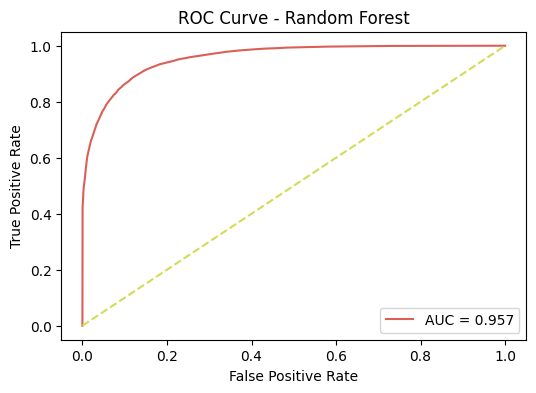

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40, stratify=y
)

rf = RandomForestClassifier(n_jobs=-1, random_state=40)
rf.fit(X_train, y_train)


rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]


print("RANDOM FOREST RESULTS\n")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

fpr, tpr, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



 XGBOOST RESULTS

Accuracy: 0.870808064251762

Confusion Matrix:
 [[16714  1793]
 [ 2148  9850]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     18507
           1       0.85      0.82      0.83     11998

    accuracy                           0.87     30505
   macro avg       0.87      0.86      0.86     30505
weighted avg       0.87      0.87      0.87     30505



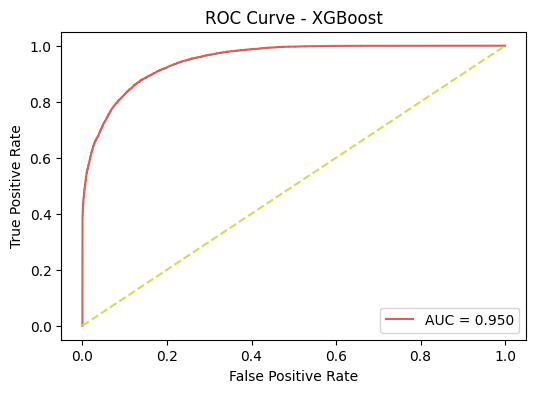

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===========================
# Entrenamiento
# ===========================
xgb = XGBClassifier(
    n_jobs=-1,
    random_state=40,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# ===========================
# Predicciones
# ===========================
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:,1]

# ===========================
# Métricas
# ===========================
print(" XGBOOST RESULTS\n")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

# ===========================
# ROC & AUC
# ===========================
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
auc_xgb = roc_auc_score(y_test, xgb_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
